In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene, shapiro, kstest, probplot
from scipy.stats import ttest_ind

DİJİTAL PAZARLAMA VERİ KÜMESİNDE DÖNÜŞÜMÜ TAHMİN ET

In [323]:
#veriyi yükle
df = pd.read_csv('digital_marketing_campaign_dataset.csv', encoding='Latin1')
# Dummy değişkenlere dönüştürmeden önce Gender sütununu saklayalım
gender_column = df['Gender'].copy()

# Yeni sütun oluşturma: Örneğin, 'Revenue per Click'
df['Revenue_per_Click'] = df['Income'] / df['EmailClicks']

# Kategorik verileri sayısal verilere dönüştürme
df = pd.get_dummies(df, columns=['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool'], drop_first=True)

# Orijinal Gender sütununu tekrar ekleyelim
df['Gender'] = gender_column
#sütun adlarını kontrol etme
print("Veri Setinin Sütun Adları:")
print(df.columns)
#ilk birkaç satırı görüntüle
print(df.head())
# Veri türlerini kontrol edelim
print(df.dtypes)

Veri Setinin Sütun Adları:
Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion', 'Revenue_per_Click', 'Gender_Male',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention', 'Gender'],
      dtype='object')
   CustomerID  Age  Income      AdSpend  ClickThroughRate  ConversionRate  \
0        8000   56  136912  6497.870068          0.043919        0.088031   
1        8001   69   41760  3898.668606          0.155725        0.182725   
2        8002   46   88456  1546.429596          0.277490        0.076423   
3        8003   32   44085   539.525936          0.137611        0.088004   
4        8004   60   83964  1678.043573          

In [324]:
# Eksik değerleri doldurma veya çıkarma
threshold = len(df) * 0.3
df = df.dropna(thresh=threshold, axis=1)

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Aykırı değerlerin tespiti ve yönetimi
def remove_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Örnek olarak bazı sütunlar üzerinde aykırı değerleri kaldırma
for column in ['Income', 'AdSpend']:
    df = remove_outliers(df, column)

# Veri türlerini düzenleme
df['CustomerID'] = df['CustomerID'].astype(str)


import pandas as pd

# Veri setini oku
data = pd.read_csv("digital_marketing_campaign_dataset.csv", encoding='latin1')

# İlk 5 gözlemi görüntüle
print("Veri Seti Örneği (5 Gözlem)")
display(data.head())

# Veri setinin boyutlarını kontrol et
print("Veri Seti Boyutu:")
print(data.shape)


# Eksik değerlerin kontrolü ve temizleme
print("Eksik Değerlerin Kontrolü:")
missing_values = data.isnull().sum()
print(missing_values.to_frame('Eksik Değerler'))


# Veri setini ekrana yazdırma
print("Veri Seti:")
display(data)


# Veri seti istatistiksel analizi
print("Veri Seti İstatistiksel Analizi:")
display(data.describe())


Veri Seti Örneği (5 Gözlem)


CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

Veri Seti Boyutu:
(8000, 20)
Eksik Değerlerin Kontrolü:
                     Eksik Değerler
CustomerID                        0
Age                               0
Gender                            0
Income                            0
CampaignChannel                   0
CampaignType                      0
AdSpend                           0
ClickThroughRate                  0
ConversionRate                    0
WebsiteVisits                     0
PagesPerVisit                     0
TimeOnSite                        0
SocialShares                      0
EmailOpens                        0
EmailClicks                       0
PreviousPurchases                 0
LoyaltyPoints                     0
AdvertisingPlatform               0
AdvertisingTool                   0
Conversion                        0
Veri Seti:


CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              0   
1     3898.668606          0.155725        0.182725             42   
2     1546.429596          0.277490        0.076423              2   
3      539.525936          0.137611        0.088004             47   
4     1678.043573          0.252851        0.109940              0   
...           ...               ...             ...            ...   
7995  8518.308575          0.243792        0.116773             23   
7996  1424.613446          0.236740        0.190061             49   
7997  4609.534635          0.056526        0.133826             35   
7998  9476.106354          0.023961        0.138386             49   
7999  7743.627070          0.185670        0.057228             15   

      PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0          2.399017    7.396803            19           6            9   
1          2.917138    5.352549             5           2            7   
2          8.223619   13.794901             0          11            2   
3          4.540939   14.688363            89           2            2   
4          2.046847   13.993370             6           6            6   
...             ...         ...           ...         ...          ...   
7995       9.693602   14.227794            70          13            6   
7996       9.499010    3.501106            52          13            1   
7997       2.853241   14.618323            38          16            0   
7998       1.002964    3.876623            86           1            5   
7999       6.964739   12.763660             2          18            9   

      PreviousPurchases  LoyaltyPoints AdvertisingPlatform AdvertisingTool  \
0                     4            688            IsConfid      ToolConfid   
1                     2           3459            IsConfid      ToolConfid   
2                     8           2337            IsConfid      ToolConfid   
3                     0           2463            IsConfid      ToolConfid   
4                     8           4345            IsConfid      ToolConfid   
...                 ...            ...                 ...             ...   
7995                  7            286            IsConfid      ToolConfid   
7996                  5           1502            IsConfid      ToolConfid   
7997                  3            738            IsConfid      ToolConfid   
7998                  7           2709            IsConfid      ToolConfid   
7999                  9            341            IsConfid      ToolConfid   

      Conversion  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
7995           0  
7996           0  
7997           1  
7998           1  
7999           0  

[8000 rows x 20 columns]

Veri Seti İstatistiksel Analizi:


CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

In [325]:
#Dönüşüm oranı
conversion_rate = df['Conversion'].sum() / len(df) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.65%


In [326]:
# Yeni sütun oluşturma: Örneğin, 'Revenue per Click'
df['Revenue_per_Click'] = df['Income'] / df['EmailClicks']

# Dönüştürülebilecek kategorik sütunları belirleyelim
categorical_columns = ['CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Mevcut kategorik verileri sayısal verilere dönüştürme
df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Oluşan sütun adlarını kontrol edelim
print("Veri Setinin Sütun Adları:")
print(df.columns)

Veri Setinin Sütun Adları:
Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion', 'Revenue_per_Click', 'Gender_Male',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention', 'Gender'],
      dtype='object')


Keşif Amaçlı Veri Analizi (EDA) Kodu

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


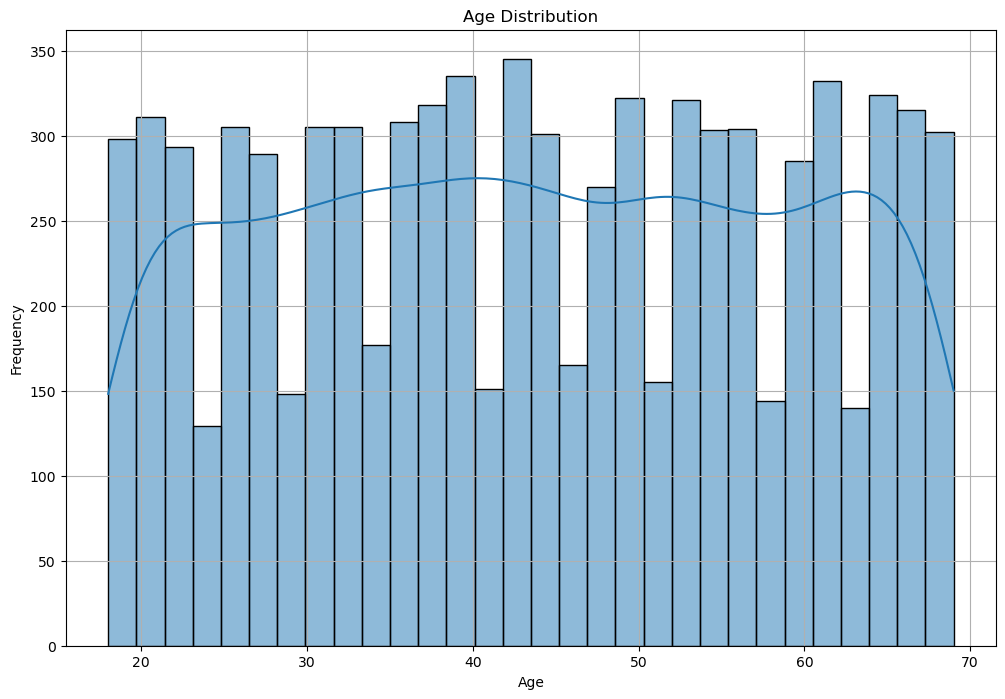

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


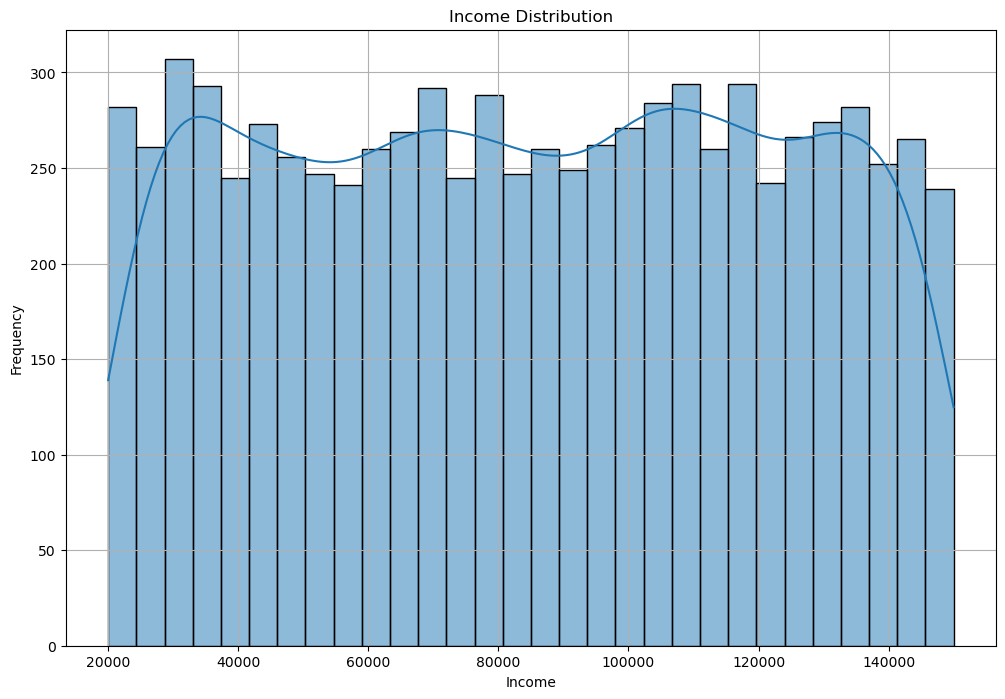

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


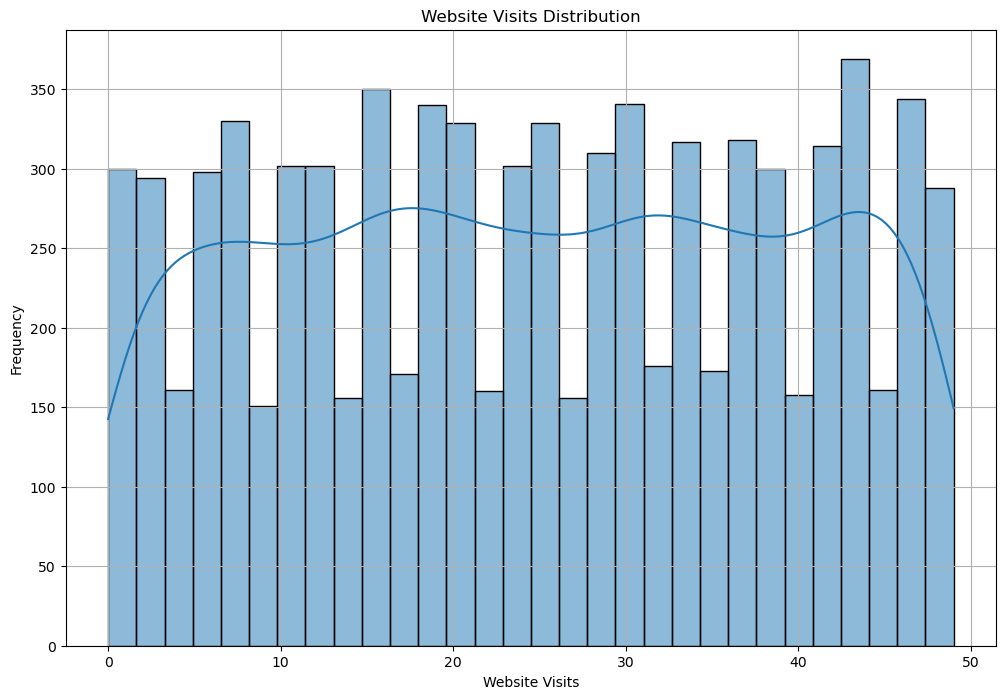

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


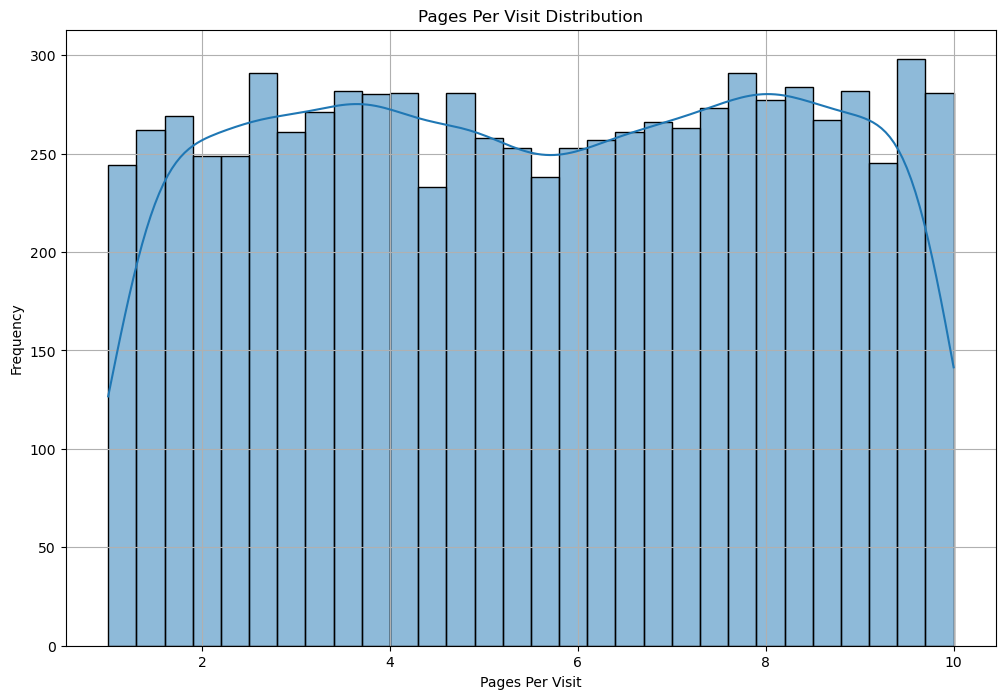

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


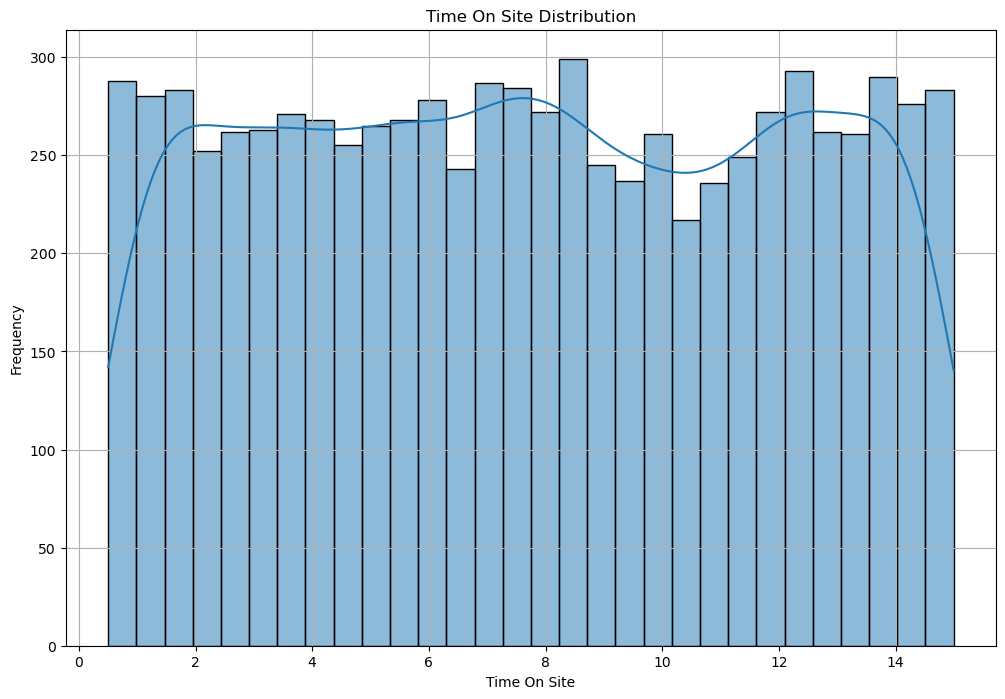

In [373]:
# Veri görselleştirme
#Yaş dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Gelir dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Reklam harcaması
plt.figure(figsize=(12, 8))
sns.histplot(df['AdSpend'], kde=True, bins=30)
plt.title('Ad Spend Distribution')
plt.xlabel('Ad Spend')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Web sitesi ziyaretleri dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['WebsiteVisits'], kde=True, bins=30)
plt.title('Website Visits Distribution')
plt.xlabel('Website Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Ziyaret başına sayfa dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['PagesPerVisit'], kde=True, bins=30)
plt.title('Pages Per Visit Distribution')
plt.xlabel('Pages Per Visit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Sahada geçen süre dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['TimeOnSite'], kde=True, bins=30)
plt.title('Time On Site Distribution')
plt.xlabel('Time On Site')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [327]:
# Yaş Dağılımı
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


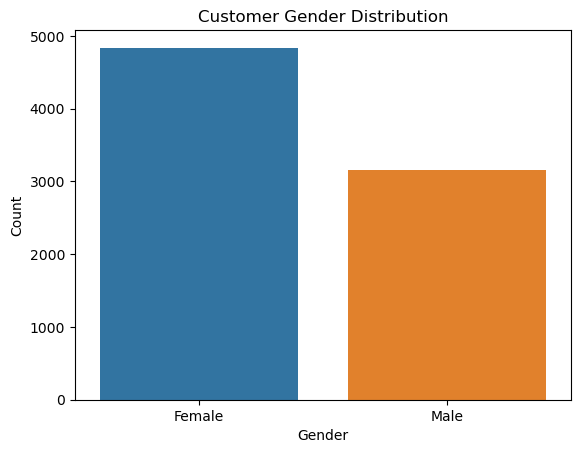

In [328]:
#Cinsiyet dağılımı
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer Gender Distribution")
plt.show()

In [330]:
# Gelir dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


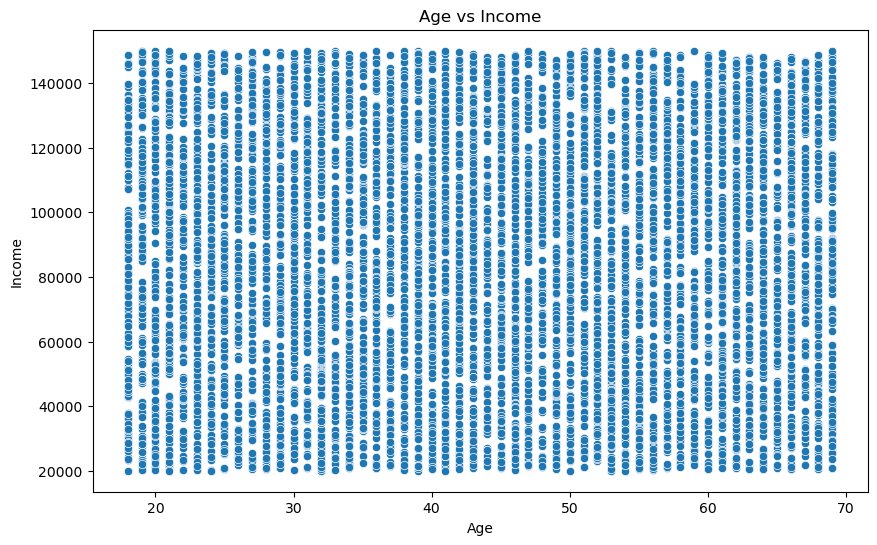

In [331]:
# Yaş ve Gelir arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Income'])
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


In [332]:
#Yaş ve Sitedeki zaman dağılımı
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='TimeOnSite', data=df, kind='scatter')
plt.suptitle('Age vs TimeOnSite', y=1.02)
plt.xlabel('Age')
plt.ylabel('TimeOnSite')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

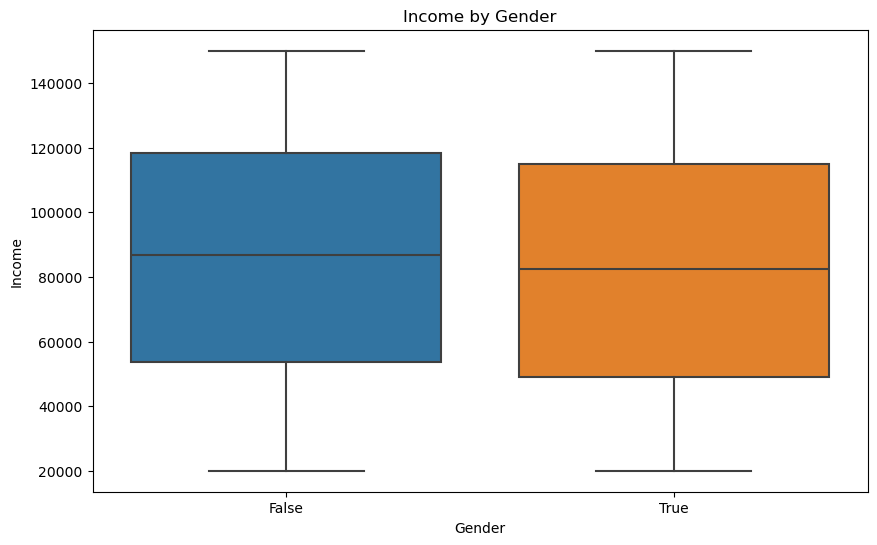

In [333]:
# Gelir ve Cinsiyet arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Income', data=df)
plt.title('Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [334]:
# Gelir ve Reklam Harcaması (AdSpend) arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AdSpend'], y=df['Income'])
plt.title('AdSpend vs Income')
plt.xlabel('AdSpend')
plt.ylabel('Income')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


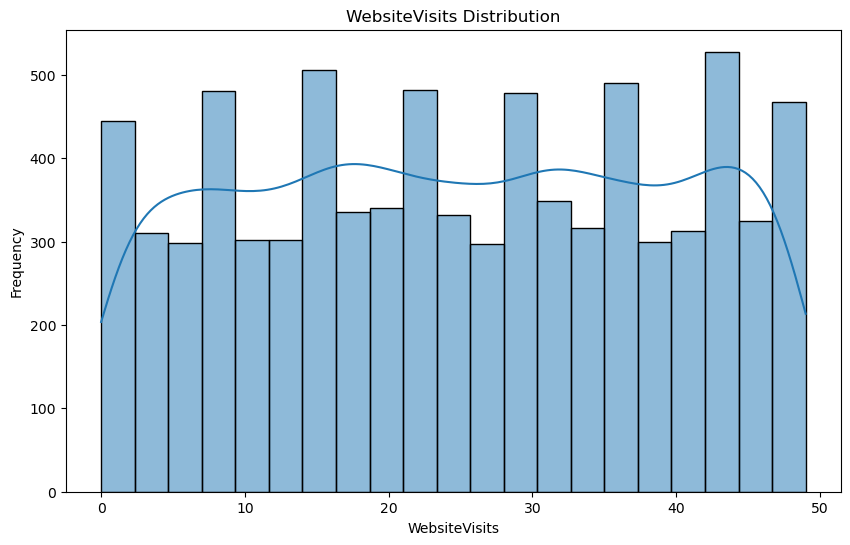

In [335]:
#Web sitesi ziyaretleri dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['WebsiteVisits'], kde=True)
plt.title('WebsiteVisits Distribution')
plt.xlabel('WebsiteVisits')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


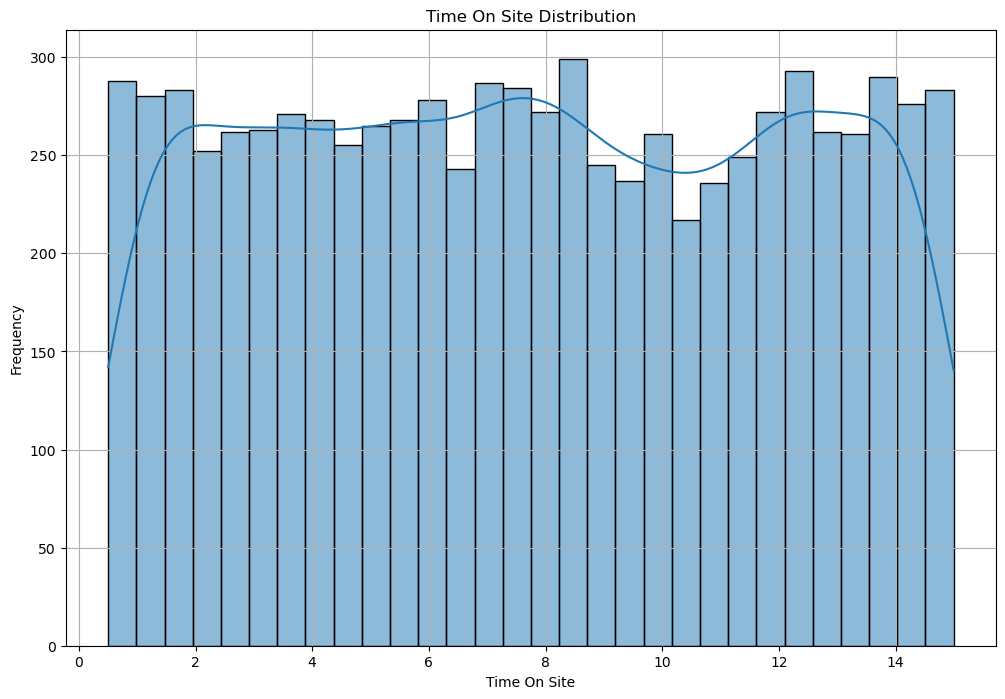

In [374]:
#Sitede geçirilen süre dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['TimeOnSite'], kde=True, bins=30)
plt.title('Time On Site Distribution')
plt.xlabel('Time On Site')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

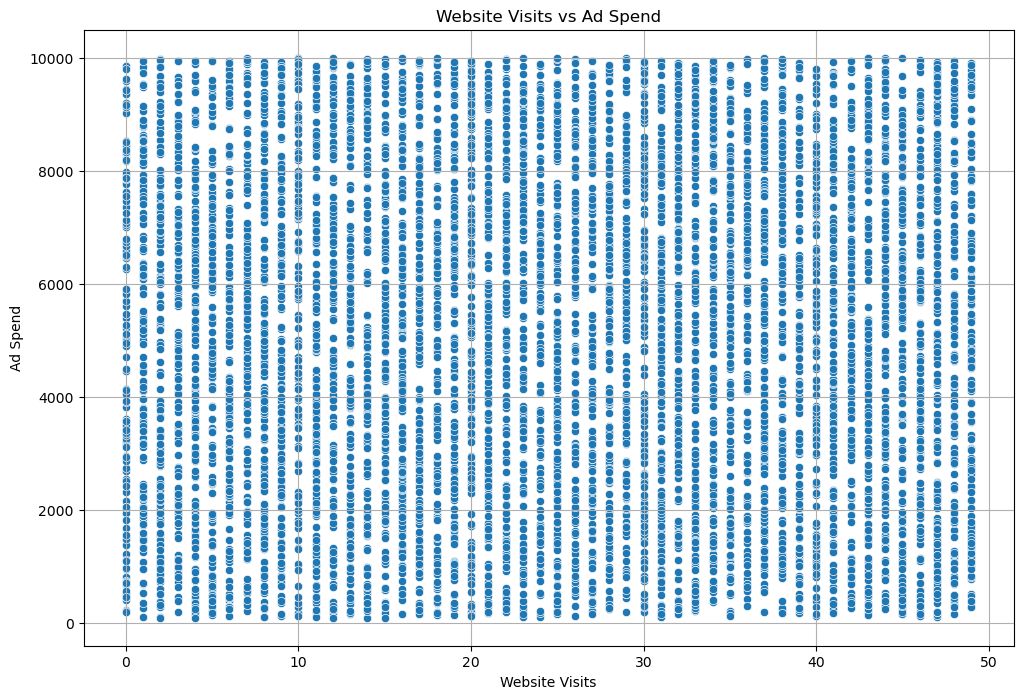

In [372]:
# Web sitesi ziyaretleri ve harcamalar arasındaki ilişki (Scatter Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WebsiteVisits', y='AdSpend', data=df)
plt.title('Website Visits vs Ad Spend')
plt.xlabel('Website Visits')
plt.ylabel('Ad Spend')
plt.grid(True)
plt.show()

/var/folders/5j/ngrtl2fd3ps0n1hn5x1r285c0000gn/T/ipykernel_46300/2382507928.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CampaignChannel'] = df_filtered['CampaignChannel'].map({


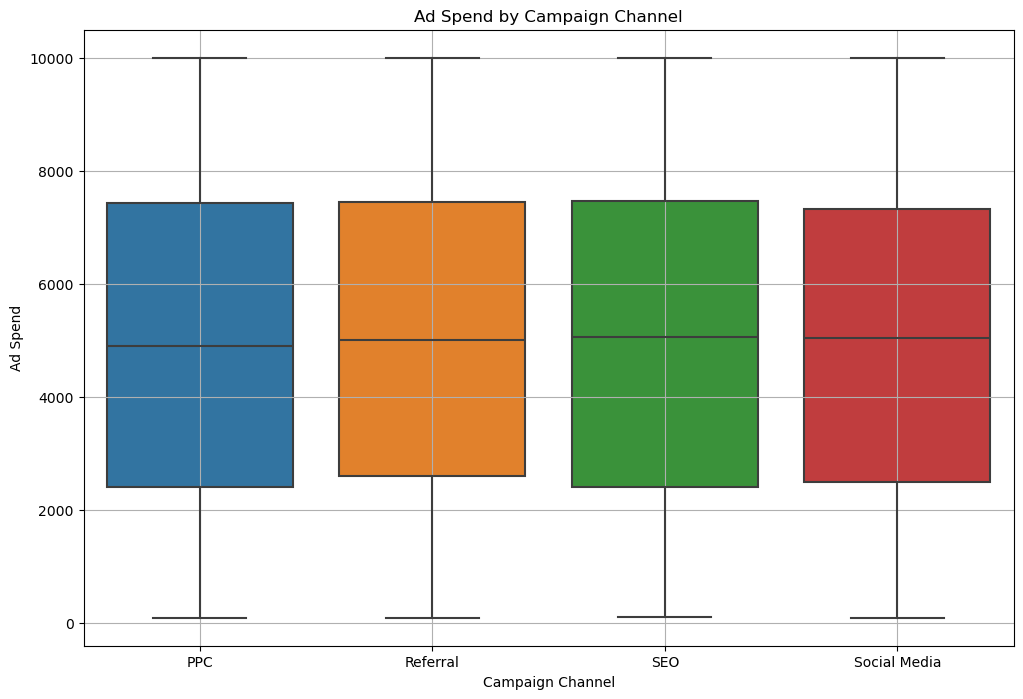

In [365]:
#Kampanya kanallarına göre maliyet dağılımı
# Kampanya kanalları sütunlarını seçme
campaign_channels = ['CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media']

# Veriyi uzun formata dönüştürme
df_melted = df.melt(id_vars=['AdSpend'], value_vars=campaign_channels, 
                    var_name='CampaignChannel', value_name='Value')

# Sadece geçerli kampanya kanallarını filtreleme
df_filtered = df_melted[df_melted['Value'] == 1]

# Kampanya kanallarını daha okunabilir hale getirelim
df_filtered['CampaignChannel'] = df_filtered['CampaignChannel'].map({
    'CampaignChannel_PPC': 'PPC',
    'CampaignChannel_Referral': 'Referral',
    'CampaignChannel_SEO': 'SEO',
    'CampaignChannel_Social Media': 'Social Media'
})

# Kampanya kanalına göre harcamaların görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.boxplot(x='CampaignChannel', y='AdSpend', data=df_filtered)
plt.title('Ad Spend by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Ad Spend')
plt.grid(True)
plt.show()

In [336]:
#Tıklama oranı ve Dönüşüm oranı arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ClickThroughRate', y='ConversionRate', data=df)
plt.title('ClickThroughRate vs ConversionRate')
plt.xlabel('ClickThroughRate')
plt.ylabel('ConversionRate')
plt.show()

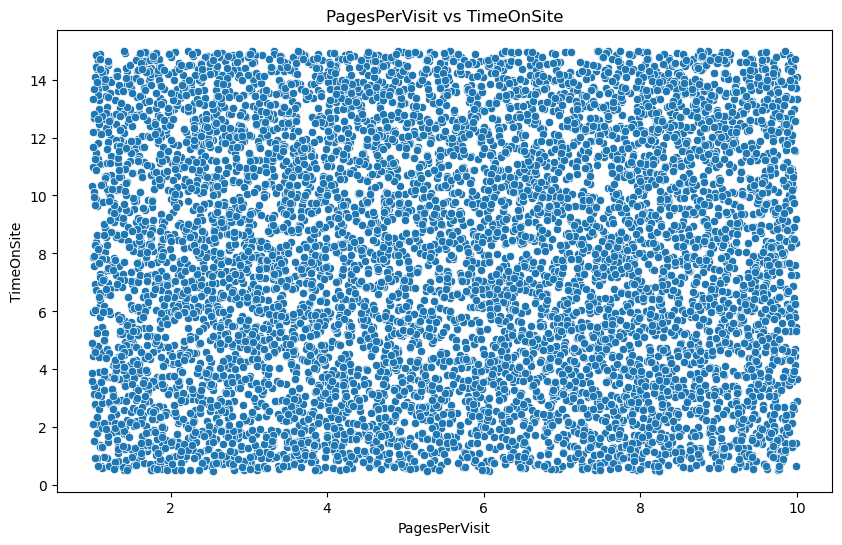

In [337]:
#Ziyaret başına sayfa sayısı ve Sitedeki zaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PagesPerVisit', y='TimeOnSite', data=df)
plt.title('PagesPerVisit vs TimeOnSite')
plt.xlabel('PagesPerVisit')
plt.ylabel('TimeOnSite')
plt.show()

In [338]:
# Gelir aralıklarını belirleyelim
df['Income_Bins'] = pd.cut(df['Income'], bins=10)

# Gelir aralıklarına göre ortalama ziyaret başına sayfa sayısını hesaplayalım
income_pages_mean = df.groupby('Income_Bins')['PagesPerVisit'].mean().reset_index()

# Sütun grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='Income_Bins', y='PagesPerVisit', data=income_pages_mean, palette='pastel')
plt.title('Income vs PagesPerVisit')
plt.xlabel('Income Range')
plt.ylabel('Average Pages Per Visit')
plt.xticks(rotation=45)
plt.show()

/var/folders/5j/ngrtl2fd3ps0n1hn5x1r285c0000gn/T/ipykernel_46300/3588462771.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_pages_mean = df.groupby('Income_Bins')['PagesPerVisit'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


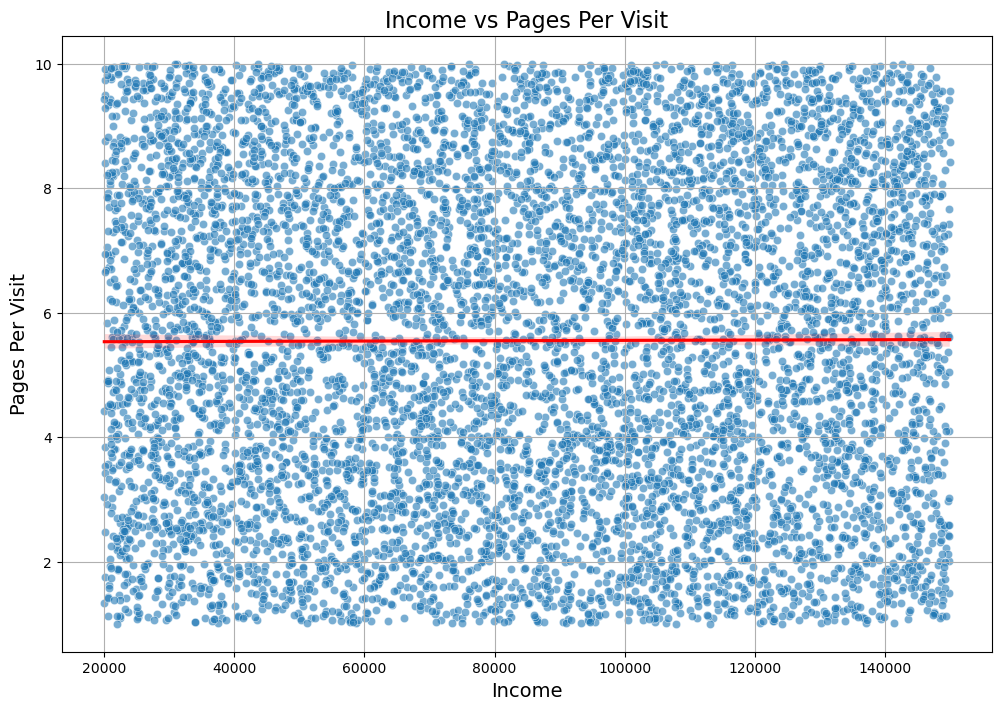

In [339]:
# Gelir ve Ziyaret Başına Sayfa Sayısı Dağılımı (Scatter Plot ve Regresyon Çizgisi)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='PagesPerVisit', data=df, alpha=0.6)
sns.regplot(x='Income', y='PagesPerVisit', data=df, scatter=False, color='red')

plt.title('Income vs Pages Per Visit', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Pages Per Visit', fontsize=14)
plt.grid(True)
plt.show()

In [340]:
#Reklam platformu ve Gelir Arasındaki İlişki
advertising_platform_columns = [col for col in df.columns if 'AdvertisingPlatform_' in col]
print(advertising_platform_columns)
#Eğer reklam platform sütunları mevcutsa grafik oluştur
if advertising_platform_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=advertising_platform_columns[0], y='Income', data=df)
    plt.title('Income by Advertising Platform')
    plt.xlabel('Advertising Platform')
    plt.ylabel('Income')
    plt.show()
else:
    print("Advertising platform columns are not available.")

[]
Advertising platform columns are not available.


In [355]:
#Kampanya Türüne Göre Ziyaret Başına Sayfa Sayısı Dağılımı
plt.figure(figsize=(12, 8))
sns.boxplot(x='CampaignType_Conversion', y='PagesPerVisit', data=df)
plt.title('Pages Per Visit by Campaign Type (Conversion)')
plt.xlabel('Campaign Type (Conversion)')
plt.ylabel('Pages Per Visit')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


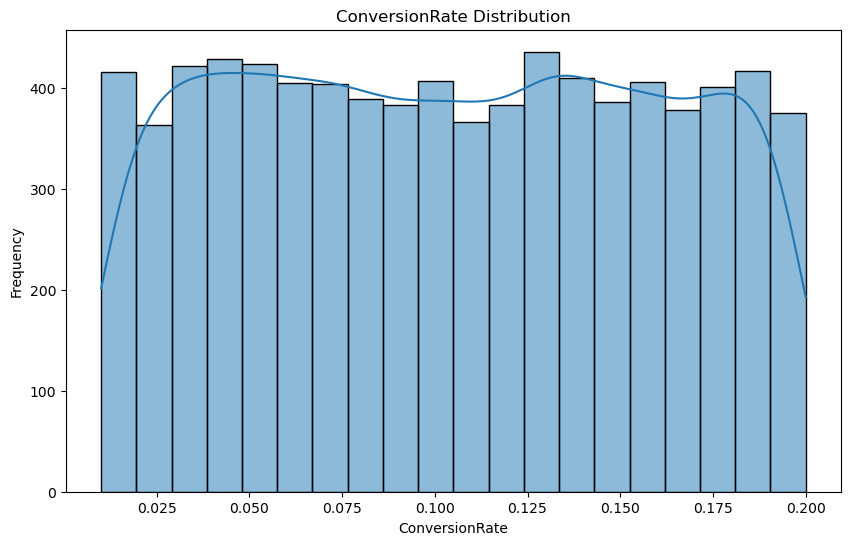

In [366]:
#Dönüşüm oranı dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['ConversionRate'], kde=True)
plt.title('ConversionRate Distribution')
plt.xlabel('ConversionRate')
plt.ylabel('Frequency')
plt.show()

In [362]:
# Kampanya kanalları sütunları
campaign_channels = ['CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media']

# Veriyi uzun formata dönüştürme
df_melted = df.melt(id_vars=['ConversionRate'], value_vars=campaign_channels, 
                    var_name='CampaignChannel', value_name='Value')

# Sadece geçerli kampanya kanallarını filtreleme
df_filtered = df_melted[df_melted['Value'] == 1]

# Kampanya kanallarını daha okunabilir hale getirelim
df_filtered['CampaignChannel'] = df_filtered['CampaignChannel'].map({
    'CampaignChannel_PPC': 'PPC',
    'CampaignChannel_Referral': 'Referral',
    'CampaignChannel_SEO': 'SEO',
    'CampaignChannel_Social Media': 'Social Media'
})

# Kampanya kanalına göre dönüşüm oranlarının görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.boxplot(x='CampaignChannel', y='ConversionRate', data=df_filtered)
plt.title('Conversion Rate by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

/var/folders/5j/ngrtl2fd3ps0n1hn5x1r285c0000gn/T/ipykernel_46300/3373675492.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CampaignChannel'] = df_filtered['CampaignChannel'].map({


In [352]:
# Sadakat puanları dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['LoyaltyPoints'], kde=True)
plt.title('LoyaltyPoints Distribution')
plt.xlabel('LoyaltyPoints')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [343]:
#Sosyal paylaşımlar dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['SocialShares'], kde=True)
plt.title('SocialShares Distribution')
plt.xlabel('SocialShares')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


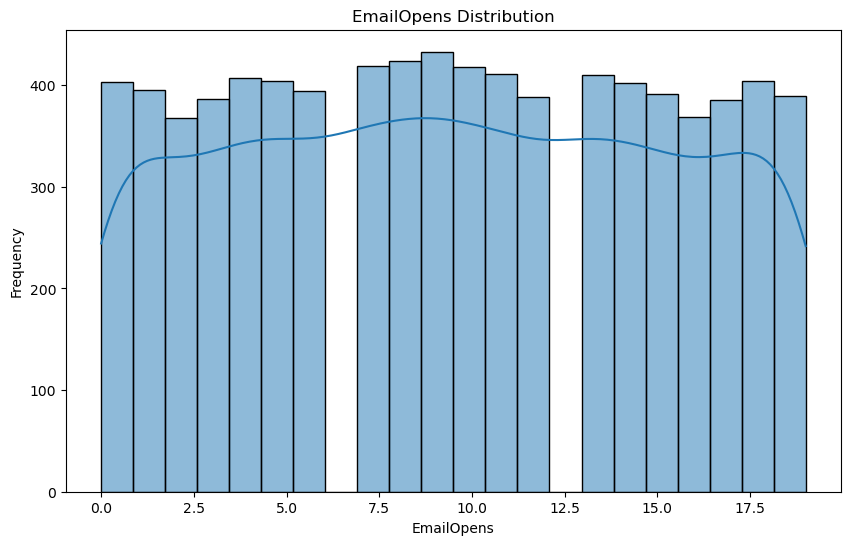

In [353]:
#E-posta Açılma Oranı Dağılımı 
plt.figure(figsize=(10, 6))
sns.histplot(df['EmailOpens'], kde=True)
plt.title('EmailOpens Distribution')
plt.xlabel('EmailOpens')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


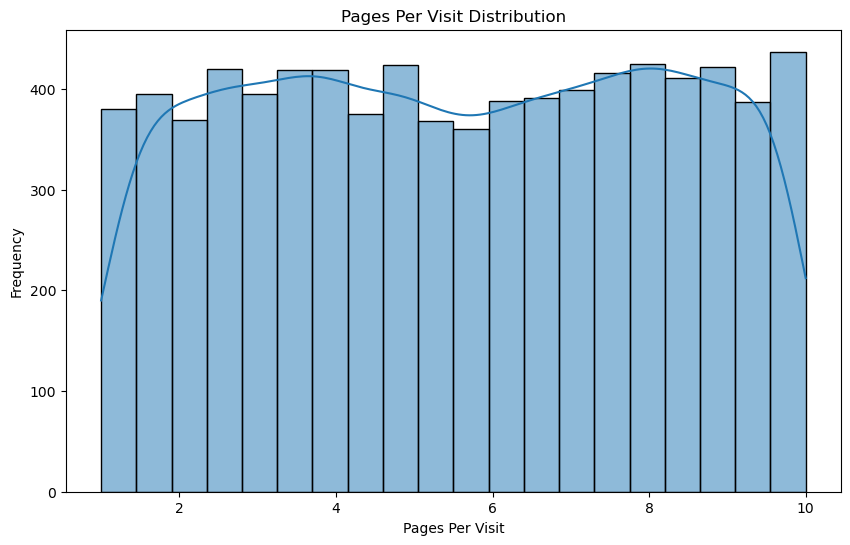

In [354]:
#Ziyaret Başına Sayfa Sayısı Dağılımı 
plt.figure(figsize=(10, 6))
sns.histplot(df['PagesPerVisit'], kde=True)
plt.title('Pages Per Visit Distribution')
plt.xlabel('Pages Per Visit')
plt.ylabel('Frequency')
plt.show()

In [369]:
# Sosyal medya kampanyalarının dönüşüm oranlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.boxplot(x='CampaignChannel_Social Media', y='ConversionRate', data=df)
plt.title('Conversion Rate for Social Media Campaigns')
plt.xlabel('Social Media Campaign')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.xticks([0, 1], ['Not Social Media', 'Social Media'])
plt.show()

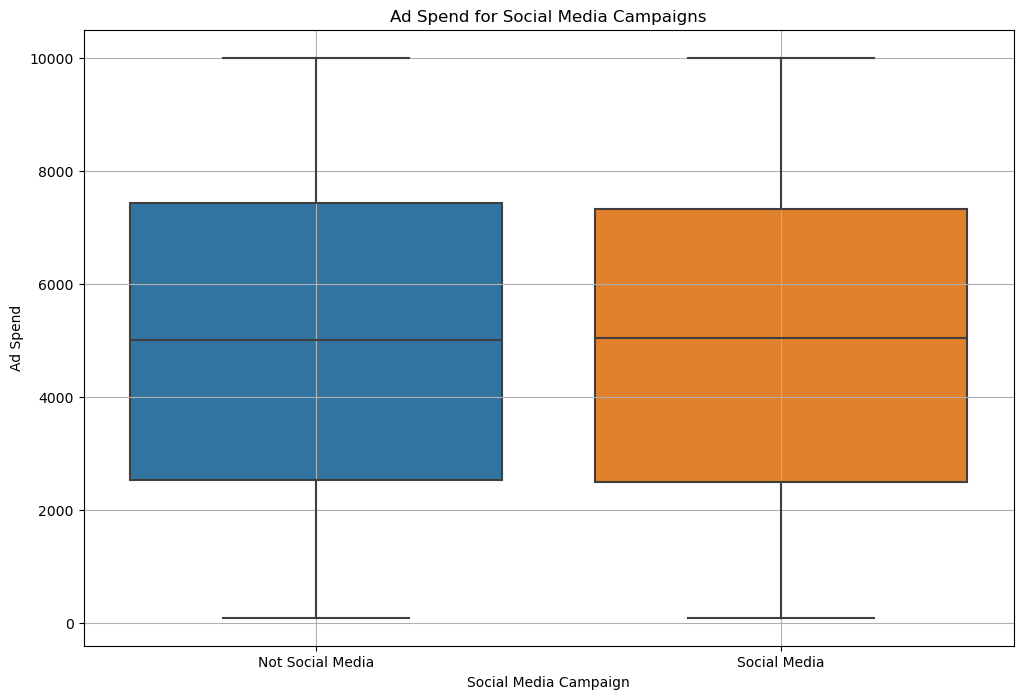

In [370]:
# Sosyal medya kampanyalarının harcamalarını görselleştirme
plt.figure(figsize=(12, 8))
sns.boxplot(x='CampaignChannel_Social Media', y='AdSpend', data=df)
plt.title('Ad Spend for Social Media Campaigns')
plt.xlabel('Social Media Campaign')
plt.ylabel('Ad Spend')
plt.grid(True)
plt.xticks([0, 1], ['Not Social Media', 'Social Media'])
plt.show()

In [371]:
# Sosyal medya kampanyalarının sayısal dağılımı
social_media_distribution = df['CampaignChannel_Social Media'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(social_media_distribution, labels=['Not Social Media', 'Social Media'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel")[0:2])
plt.title('Distribution of Social Media Campaigns')
plt.show()


In [344]:
#Önceki satın almalar ve Gelir arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PreviousPurchases', y='Income', data=df)
plt.title('Previous Purchases vs Income')
plt.xlabel('Previous Purchases')
plt.ylabel('Income')
plt.show()

['CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention']


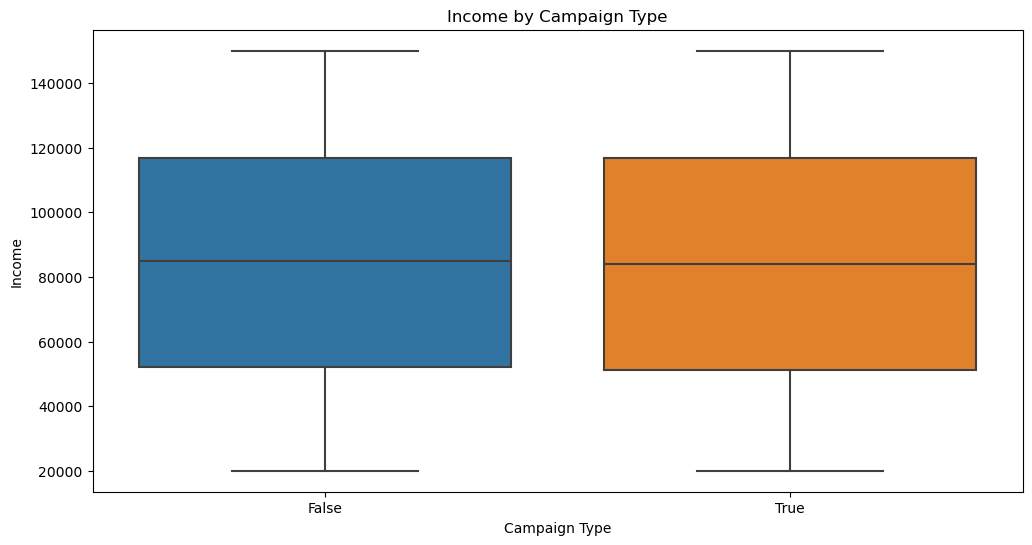

In [345]:
# Kampanya Türüne Göre Gelir Dağılımı
campaign_type_columns = [col for col in df.columns if 'CampaignType_' in col]
print(campaign_type_columns)
# Eğer kampanya türü sütunları mevcutsa grafik oluştur
if campaign_type_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=campaign_type_columns[0], y='Income', data=df)
    plt.title('Income by Campaign Type')
    plt.xlabel('Campaign Type')
    plt.ylabel('Income')
    plt.show()
else:
    print("Campaign type columns are not available.")


In [346]:
#Kampanya kanalı ve Gelir dağılımı
campaign_channel_columns = [col for col in df.columns if 'CampaignChannel_' in col]
print(campaign_channel_columns)

if campaign_channel_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=campaign_channel_columns[0], y='Income', data=df)
    plt.title('Income by Campaign Channel')
    plt.xlabel('Campaign Channel')
    plt.ylabel('Income')
    plt.show()
else:
    print("Campaign Channel columns are not available.")

['CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media']


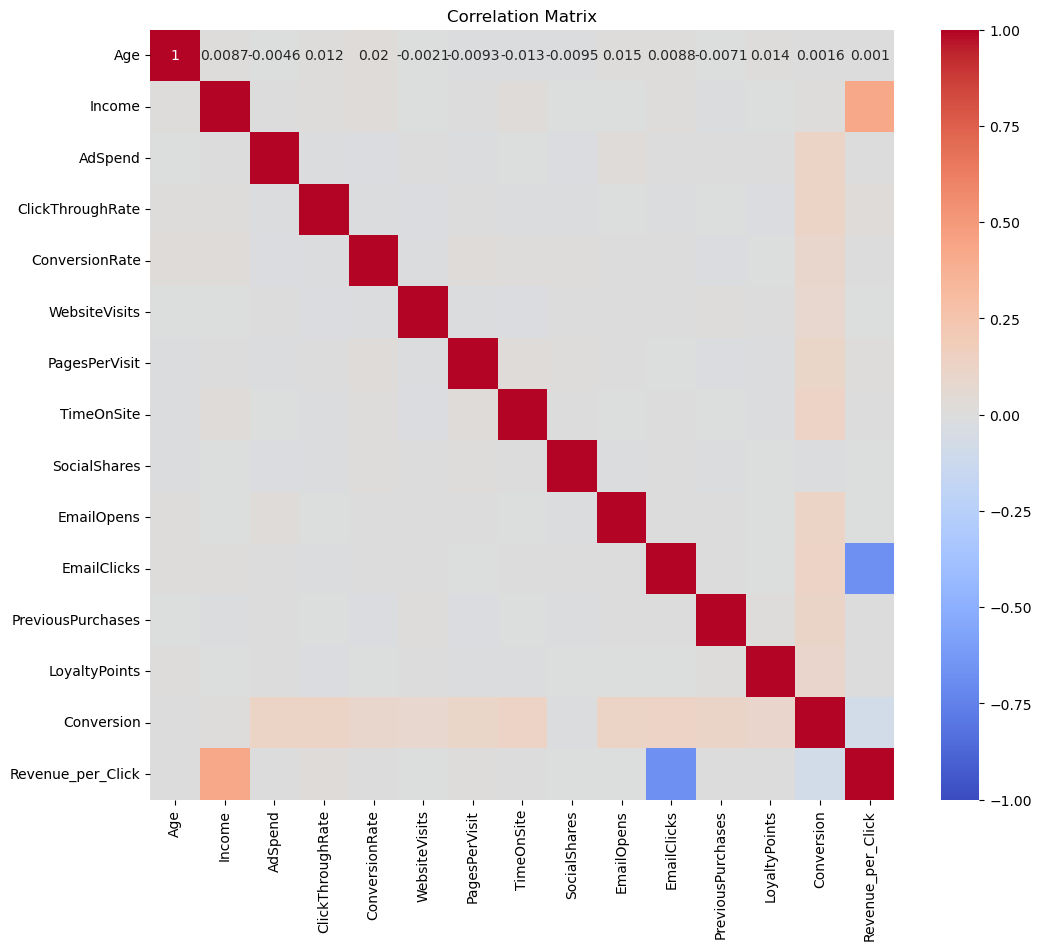

In [347]:
# Sadece sayısal sütunları seçelim
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [348]:
# Levene testi
# Gender sütunlarının mevcut olup olmadığını kontrol edelim
if 'Gender_Male' in df.columns:
    male_income = df[df['Gender_Male'] == 1]['Income']
    female_income = df[df['Gender_Male'] == 0]['Income']

    stat, p_value = levene(male_income, female_income)

    print(f"Levene Test Statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05).")
    else:
        print("The variances are not significantly different (p >= 0.05).")

    # Gelir ve cinsiyet arasındaki ilişkiyi daha detaylı incelemek için boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Gender_Male', y='Income', data=df)
    plt.title('Income by Gender with Levene Test Result', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Income', fontsize=14)
    plt.grid(True)

    # Levene test sonucunu grafikte gösterme
    levene_text = f"Levene Test Statistic: {stat:.2f}\nP-value: {p_value:.2e}"
    plt.gca().text(0.05, 0.95, levene_text, transform=plt.gca().transAxes,
                   fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.xticks([0, 1], ['Female', 'Male'])  # X eksenindeki değerleri etiketle

    plt.show()
else:
    print("Gender_Male sütunu veri setinde bulunamadı.")

Levene Test Statistic: 0.34124961230516604
P-value: 0.5591252839433515
The variances are not significantly different (p >= 0.05).


t-Test Statistic: -3.7030317007504774
P-value: 0.00021474558151595363
The mean incomes are significantly different (p < 0.05).


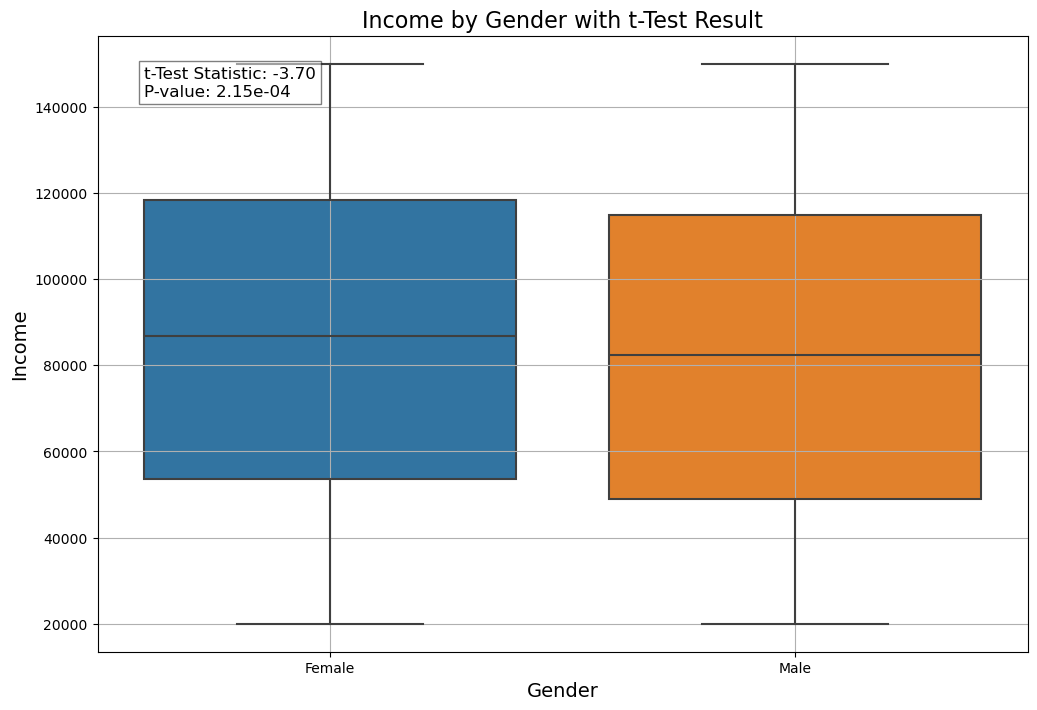

In [349]:
# Cinsiyet sütununun mevcut olup olmadığını kontrol edelim
if 'Gender' in df.columns:
    # t-testi
    male_income = df[df['Gender'] == 'Male']['Income']
    female_income = df[df['Gender'] == 'Female']['Income']

    stat, p_value = ttest_ind(male_income, female_income, equal_var=False)  # equal_var=False varsayımı kullanılır

    print(f"t-Test Statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("The mean incomes are significantly different (p < 0.05).")
    else:
        print("The mean incomes are not significantly different (p >= 0.05).")

    # Gelir ve cinsiyet arasındaki ilişkiyi daha detaylı incelemek için boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Gender', y='Income', data=df)
    plt.title('Income by Gender with t-Test Result', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Income', fontsize=14)
    plt.grid(True)

    # t-testi sonucunu grafikte gösterme
    ttest_text = f"t-Test Statistic: {stat:.2f}\nP-value: {p_value:.2e}"
    plt.gca().text(0.05, 0.95, ttest_text, transform=plt.gca().transAxes,
                   fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()
else:
    print("Gender sütunu veri setinde bulunamadı.")


In [350]:
from scipy.stats import shapiro

# Shapiro-Wilk testi uygulama (örnek olarak 'Income' sütunu)
stat, p_value = shapiro(df['Income'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Income data does not follow a normal distribution (p < 0.05).")
else:
    print("Income data follows a normal distribution (p >= 0.05).")

# Gelir verisinin Q-Q Plot ile görselleştirilmesi
from scipy.stats import probplot

plt.figure(figsize=(10, 6))
probplot(df['Income'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Income')
plt.show()

Shapiro-Wilk Test Statistic: 0.9538237452507019
P-value: 1.5414283107572988e-44
Income data does not follow a normal distribution (p < 0.05).


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [351]:
from scipy.stats import kstest

# Kolmogorov-Smirnov testi uygulama (örnek olarak 'Income' sütunu)
stat, p_value = kstest(df['Income'], 'norm', args=(df['Income'].mean(), df['Income'].std()))

print(f"K-S Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Income data does not follow a normal distribution (p < 0.05).")
else:
    print("Income data follows a normal distribution (p >= 0.05).")

# Gelir verisinin dağılımının görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

K-S Test Statistic: 0.06015573309352315
P-value: 1.314150454891847e-25
Income data does not follow a normal distribution (p < 0.05).


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [358]:
#Cinsiyet ve Kampanya kanalı arasındaki ilişki
# Crosstab oluşturma
crosstab = pd.crosstab(df['Gender'], df['CampaignChannel_PPC'])

# Crosstab sonuçlarını yazdırma
print(crosstab)

# Heatmap ile görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Greens')
plt.title('Crosstab of Gender and CampaignChannel_PPC')
plt.xlabel('Campaign Channel (PPC)')
plt.ylabel('Gender')
plt.show()


CampaignChannel_PPC  False  True 
Gender                           
Female                3839   1000
Male                  2506    655


CampaignType_Retention  False  True 
Gender                              
Female                   3674   1165
Male                     2379    782


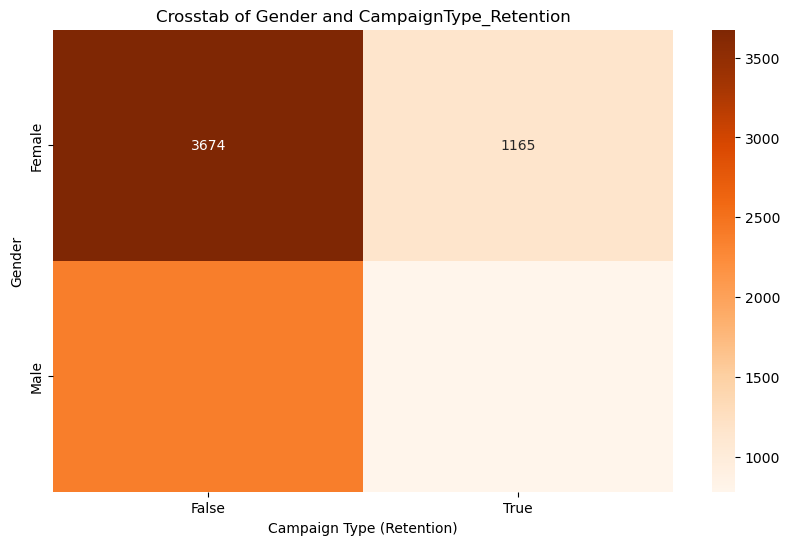

In [359]:
#Cinsiyet ve Kampanya türü tutulma arasındaki ilişki
# Crosstab oluşturma
crosstab = pd.crosstab(df['Gender'], df['CampaignType_Retention'])

# Crosstab sonuçlarını yazdırma
print(crosstab)

# Heatmap ile görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Oranges')
plt.title('Crosstab of Gender and CampaignType_Retention')
plt.xlabel('Campaign Type (Retention)')
plt.ylabel('Gender')
plt.show()

In [357]:
#Cinsiyet ve dönüştürme arasındaki ilişki
# Crosstab oluşturma
crosstab = pd.crosstab(df['Gender'], df['CampaignType_Conversion'])

# Crosstab sonuçlarını yazdırma
print(crosstab)

# Heatmap ile görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab of Gender and CampaignType_Conversion')
plt.xlabel('Campaign Type (Conversion)')
plt.ylabel('Gender')
plt.show()

CampaignType_Conversion  False  True 
Gender                               
Female                    3552   1287
Male                      2371    790
